<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка." data-toc-modified-id="Предобработка.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка.</a></span></li><li><span><a href="#Анализ-данных." data-toc-modified-id="Анализ-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Проверим-2-первые-ситуации:" data-toc-modified-id="Проверим-2-первые-ситуации:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверим 2 первые ситуации:</a></span></li><li><span><a href="#Проверим-3-ситуацию:" data-toc-modified-id="Проверим-3-ситуацию:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверим 3 ситуацию:</a></span></li><li><span><a href="#Исследуем-данные." data-toc-modified-id="Исследуем-данные.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем данные.</a></span><ul class="toc-item"><li><span><a href="#Рассмотрим-результаты-опроса-и-информацию-с-пиплметра-для-всех-ТВ-домохозяйств." data-toc-modified-id="Рассмотрим-результаты-опроса-и-информацию-с-пиплметра-для-всех-ТВ-домохозяйств.-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Рассмотрим результаты опроса и информацию с пиплметра для всех ТВ домохозяйств.</a></span></li><li><span><a href="#Выясним-сколько-ТВ-имеется-в-домохозяйствах." data-toc-modified-id="Выясним-сколько-ТВ-имеется-в-домохозяйствах.-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Выясним сколько ТВ имеется в домохозяйствах.</a></span></li><li><span><a href="#Выясним-сколько-человек-проживает-в-домохозяйстве." data-toc-modified-id="Выясним-сколько-человек-проживает-в-домохозяйстве.-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Выясним сколько человек проживает в домохозяйстве.</a></span></li></ul></li></ul></li></ul></div>

# Тестовое задание на вакансию аналитик python (ТВ-исследования).

Есть два файла: `src_survey` и `src_OnOff`.   
В таблице `src_survey` результат опроса респондентов - участников исследования, целью которого является проверка работы оборудования и регистрации респондентов на пиплметре (измерительное устройство для фиксации телесмотрения).   
В рамках каждой процедуры в одном домохозяйстве (ДХ) проверяется, кто из респондентов находится в комнате с включенным телевизором. В ДХ может быть несколько приборов (телевизоров), могут проживать несколько респондентов. В опросе содержится информация по каждому телевизору и каждому респонденту. Далее, результат опроса сравнивается с данными регистрации респондента на пиплметре во время опроса, результат сравнения фиксируется в таблице (см. описание полей).    


Нужно проанализировать:    
1.	Количество ситуаций `(абс, %)`, когда прибор фактически выключен (данные в таблице `src_OnOff`), а респондент утверждает, что включен.    
2.	Количество ситуаций `(абс, %)`, когда прибор фактически включен (данные в таблице `src_OnOff`), а респондент утверждает, что выключен.    
3.	Выделить ДХ с размером более 1 человека, среди них ситуации, телевизор фактически включен, респондент по данным опроса находится в комнате с включенным телевизором, регистрации нет, а у других респондентов в этом ДХ регистрация на этом телевизоре есть. Необходимо сгруппировать результат в зависимости от размера ДХ.    


**Описание полей:**  
●	статус телевизора по утверждению респондента: `tv state`   
●	размер ДХ: Кол-во человек в семье 4+   
●	наличие фактической регистрации на пиплметре: `see`   
●	наличие респондента в комнате с телевизором согласно опросу: `display`   
●	идентификатор ДХ: `passport` (`PassportNumber` в таблице `src_OnOff` )  
●	фактический статус телевизора: `DeviceState` (ON включен, OFF выключен)    
●	идентификатор респондента: `button`   
●	идентификатор телевизора: `unit` (`UnitNumber` в таблице `src_OnOff`)    


# Решение.



In [1]:
# Импорт библиотек
import pandas as pd
import datetime

## Предобработка.

In [2]:
# Считывание файла и запись в переменную
df_onoff = pd.read_excel('src_OnOff.xlsx')
# Вывод таблицы на экран
df_onoff

,PassportNumber,UnitNumber,DeviceState,Begin,End
0,10100003,0,OFF,2022-02-07 02:00:00.000,2022-02-08 02:00:00.000
1,10100003,0,OFF,2022-02-08 02:00:00.000,2022-02-08 11:48:42.000
2,10100003,0,ON,2022-02-08 11:48:42.000,2022-02-08 12:36:55.000
3,10100003,0,OFF,2022-02-08 12:36:55.000,2022-02-08 22:05:17.000
4,10100003,0,ON,2022-02-08 22:05:17.000,2022-02-08 23:48:03.000
...,...,...,...,...,...
642129,502286,0,OFF,2022-02-15 20:16:01.000,2022-02-15 20:53:31.000
642130,502286,0,ON,2022-02-15 20:53:31.000,2022-02-15 21:43:15.000
642131,502286,0,OFF,2022-02-15 21:43:15.000,2022-02-15 22:09:59.000
642132,502286,0,ON,2022-02-15 22:09:59.000,2022-02-15 22:19:33.000


In [3]:
# Считывание файла и запись в переменную
df_survey = pd.read_excel('src_survey.xlsx')
# Вывод таблицы на экран
df_survey[50:100]

,code,passport,button,tv state,unit,day,cs_start,cs_finish,see,display,Кол-во человек в семье 4+
50,258128,1210930,Б,выключен,0,07.02.22,18:52:47,18:54:12,нет регистрации,нет в комнате,4
51,258128,1210930,В,включён,1,07.02.22,18:52:47,18:54:12,нет регистрации,нет в комнате,4
52,258128,1210930,В,выключен,0,07.02.22,18:52:47,18:54:12,нет регистрации,нет в комнате,4
53,258128,1210930,Г,включён,1,07.02.22,18:52:47,18:54:12,нет регистрации,нет в комнате,4
54,258128,1210930,Г,выключен,0,07.02.22,18:52:47,18:54:12,нет регистрации,нет в комнате,4
55,258130,1211011,А,включён,0,07.02.22,19:01:00,19:03:10,есть регистрация,в комнате,2
56,258130,1211011,А,выключен,1,07.02.22,19:01:00,19:03:10,нет регистрации,нет в комнате,2
57,258130,1211011,Б,включён,0,07.02.22,19:01:00,19:03:10,нет регистрации,нет в комнате,2
58,258130,1211011,Б,выключен,1,07.02.22,19:01:00,19:03:10,нет регистрации,нет в комнате,2
59,258131,1211013,А,включён,0,07.02.22,19:07:48,19:09:01,есть регистрация,в комнате,2


In [4]:
# Анализ колонки таблицы
df_survey['day'].value_counts()

14.02.22               90
07.02.22               60
15.02.22               33
16.02.22                9
09.02.22                8
08.02.22                3
2022-02-08 00:00:00     2
10.02.22                2
Name: day, dtype: int64

**Замечание:**
В данной колонке присутствуют 2 записи в отличном формате от остальных. Приведём все записи в один вид.

In [5]:
# Замена значений колонки по условию
df_survey.loc[df_survey['day'] == datetime.datetime(2022, 2, 8, 0, 0), 'day'] = '08.02.22'

In [6]:
# Объединение колонок даты и времени в общие по аналогии с таблицей df_onoff
df_survey['surv_start'] = df_survey['day'].astype(str) + ' ' +  df_survey['cs_start'].astype(str)
df_survey['surv_finish'] = df_survey['day'].astype(str) + ' ' +  df_survey['cs_finish'].astype(str)

# Перевод значений колонок в формат datetime
df_survey['surv_start'] = pd.to_datetime(df_survey['surv_start'], dayfirst=True)
df_survey['surv_finish'] = pd.to_datetime(df_survey['surv_finish'], dayfirst=True)

# Вывод таблицы на экран
df_survey

,code,passport,button,tv state,unit,day,cs_start,cs_finish,see,display,Кол-во человек в семье 4+,surv_start,surv_finish
0,258104,1204558,А,выключен,0,07.02.22,16:25:18,16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09
1,258106,1205697,Б,включён,0,07.02.22,16:50:18,16:53:17,нет регистрации,в комнате,3,2022-02-07 16:50:18,2022-02-07 16:53:17
2,258106,1205697,А,включён,0,07.02.22,16:50:18,16:53:17,нет регистрации,нет в комнате,3,2022-02-07 16:50:18,2022-02-07 16:53:17
3,258106,1205697,В,включён,0,07.02.22,16:50:18,16:53:17,нет регистрации,в комнате,3,2022-02-07 16:50:18,2022-02-07 16:53:17
4,258109,1206994,А,выключен,1,08.02.22,03:05:31,03:06:58,нет регистрации,нет в комнате,1,2022-02-08 03:05:31,2022-02-08 03:06:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,258546,1212330,А,включён,0,14.02.22,18:44:21,18:46:04,нет регистрации,нет в комнате,4,2022-02-14 18:44:21,2022-02-14 18:46:04
203,258546,1212330,Б,включён,0,14.02.22,18:44:21,18:46:04,нет регистрации,нет в комнате,4,2022-02-14 18:44:21,2022-02-14 18:46:04
204,258546,1212330,Д,включён,0,14.02.22,18:44:21,18:46:04,есть регистрация,в комнате,4,2022-02-14 18:44:21,2022-02-14 18:46:04
205,258548,1212873,А,включён,0,14.02.22,19:24:42,19:26:55,есть регистрация,в комнате,1,2022-02-14 19:24:42,2022-02-14 19:26:55


**Замечание:**
Проведём анализ таблицы `df_survey`. Выясним по скольким домохозяйств (ДХ) мы располагаем данными и могут ли совпадать время для опросов в разных ДХ.

In [7]:
# Вывод количества уникальных значений в столбцах
print(f"Кол-во уник. ДХ: {len(df_survey['passport'].unique())}")
print(f"Кол-во уник. показателей времени surv_start: {len(df_survey['surv_start'].unique())}")
print(f"Кол-во уник. показателей времени surv_finish: {len(df_survey['surv_finish'].unique())}")
print(f"Кол-во уник. комбинаций 3-х столбцов: {len(df_survey[['passport', 'surv_start', 'surv_finish']].value_counts())}")

Кол-во уник. ДХ: 45
Кол-во уник. показателей времени surv_start: 45
Кол-во уник. показателей времени surv_finish: 45
Кол-во уник. комбинаций 3-х столбцов: 45


In [8]:
comb_1 = len(df_survey[['passport', 'surv_start', 'surv_finish']].value_counts())
comb_2 = len(df_survey[['passport', 'surv_start', 'surv_finish', 'unit']].value_counts())
comb_3 = len(df_survey[['passport', 'surv_start', 'surv_finish', 'unit', 'button']].value_counts())
print(f"Кол-во уник. комбинаций 3-х столбцов: {comb_1}")
print(f"Кол-во уник. комбинаций 4-х столбцов: {comb_2}")
print(f"Кол-во уник. комбинаций 5-х столбцов: {comb_3}")

Кол-во уник. комбинаций 3-х столбцов: 45
Кол-во уник. комбинаций 4-х столбцов: 78
Кол-во уник. комбинаций 5-х столбцов: 207


**Замечание:** У нас имеются 45 уникальных ДХ. При этолм каждому ДХ соответствует один временной интервал `surv_start-surv_finish`. Всего у нас 207 записей. Получается, что для одного ДХ может быть несколько записей отличающихся значениями столбцов `unit` - идентификатор ТВ и `button` - идентификатор пользователя. При этом временной интервал для них один и тот же.

Скорее всего в опросе участвовал только один человек на ДХ, который зарегистрирован в системе и он заполнял информацию по всем ТВ и людям находящимся в ДХ.

In [9]:
# Объединение таблиц `df_survey` и `df_onoff`
merged_df = pd.merge(df_survey,
                     df_onoff,
                     left_on=['passport', 'unit'],
                     right_on=['PassportNumber', 'UnitNumber'] ,
                     how='left')

# Перевод значений колонок в формат datetime в соотв. с таблицей df_survey
merged_df['Begin'] = pd.to_datetime(merged_df['Begin'], format='%Y-%m-%d %H:%M:%S')
merged_df['End'] = pd.to_datetime(merged_df['End'], format='%Y-%m-%d %H:%M:%S')

# Вывод таблицы на экран
merged_df

,code,passport,button,tv state,unit,day,cs_start,cs_finish,see,display,Кол-во человек в семье 4+,surv_start,surv_finish,PassportNumber,UnitNumber,DeviceState,Begin,End
0,258104,1204558,А,выключен,0,07.02.22,16:25:18,16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09,1204558,0,OFF,2022-02-07 02:00:00,2022-02-07 17:17:45
1,258104,1204558,А,выключен,0,07.02.22,16:25:18,16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09,1204558,0,ON,2022-02-07 17:17:45,2022-02-07 21:46:30
2,258104,1204558,А,выключен,0,07.02.22,16:25:18,16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09,1204558,0,OFF,2022-02-07 21:46:30,2022-02-08 02:00:00
3,258104,1204558,А,выключен,0,07.02.22,16:25:18,16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09,1204558,0,OFF,2022-02-08 02:00:00,2022-02-08 16:39:15
4,258104,1204558,А,выключен,0,07.02.22,16:25:18,16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09,1204558,0,ON,2022-02-08 16:39:15,2022-02-08 21:13:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9269,258552,1212916,А,включён,0,14.02.22,19:39:23,19:41:36,есть регистрация,в комнате,1,2022-02-14 19:39:23,2022-02-14 19:41:36,1212916,0,OFF,2022-02-15 01:21:06,2022-02-15 02:00:00
9270,258552,1212916,А,включён,0,14.02.22,19:39:23,19:41:36,есть регистрация,в комнате,1,2022-02-14 19:39:23,2022-02-14 19:41:36,1212916,0,OFF,2022-02-15 02:00:00,2022-02-15 02:49:55
9271,258552,1212916,А,включён,0,14.02.22,19:39:23,19:41:36,есть регистрация,в комнате,1,2022-02-14 19:39:23,2022-02-14 19:41:36,1212916,0,ON,2022-02-15 02:49:55,2022-02-15 10:04:29
9272,258552,1212916,А,включён,0,14.02.22,19:39:23,19:41:36,есть регистрация,в комнате,1,2022-02-14 19:39:23,2022-02-14 19:41:36,1212916,0,OFF,2022-02-15 10:04:29,2022-02-15 16:26:17


**Замечание:** Мы объединили 2 таблицы по значениям паспорта ДХ и идентификатора ТВ. Получилось 9274 строки, из-за того, что датчики снимали данные намного чаще, чем люди участвовали в опросе.

Оставим только те строки для которых интервал времени из таблицы `df_survey` (опрос людей) входит в интервал времени из таблицы `df_onoff` (данные из пиплметра). Таким образом мы сможем адекватно проводить исследование.

In [10]:
# Создание колонки соответствия интервалов времени
merged_df['match'] = (merged_df['surv_start'] >= merged_df['Begin']) & (merged_df['surv_finish'] <= merged_df['End'])

In [11]:
# Фильтрация таблицы и сохранение в переменную df
df = merged_df[merged_df['match'] == True]
len(df), len(df['passport'].unique())

(195, 43)

**Замечание:** Получилось 195 строк. В таблице осталось 43 домохозяйства. Для двух ДХ не оказалось необходимых данных с пиплметра.

## Анализ данных.

### Проверим 2 первые ситуации:
1. прибор фактически выключен (данные в таблице `src_OnOff`), а респондент утверждает, что включен.
2. прибор фактически включен (данные в таблице `src_OnOff`), а респондент утверждает, что выключен.

In [12]:
# Импорт библиотек
import matplotlib.pyplot as plt
import seaborn as sns
# Отключение ошибок
pd.options.mode.chained_assignment = None
# Назначение количества отображаемых колонок
pd.set_option('display.max_columns', 100)

In [13]:
# Моделирование двух ситуаций
df['situation_1'] = (df['DeviceState'] == 'OFF') & (df['tv state'] == 'включён')
df['situation_2'] = (df['DeviceState'] == 'ON') & (df['tv state'] == 'выключен')

print(f"Первая ситуация: {df['situation_1'].sum()}")
print(f"Вторая ситуация: {df['situation_2'].sum()}")

Первая ситуация: 0
Вторая ситуация: 3


In [14]:
# Вывод данных для второй ситуации на экран
df[df['situation_2']]

,code,passport,button,tv state,unit,day,cs_start,cs_finish,see,display,Кол-во человек в семье 4+,surv_start,surv_finish,PassportNumber,UnitNumber,DeviceState,Begin,End,match,situation_1,situation_2
167,258109,1206994,А,выключен,1,08.02.22,03:05:31,03:06:58,нет регистрации,нет в комнате,1,2022-02-08 03:05:31,2022-02-08 03:06:58,1206994,1,ON,2022-02-08 02:00:00,2022-02-09 02:00:00,True,False,True
5521,258521,1208646,А,выключен,0,14.02.22,19:43:33,19:45:31,нет регистрации,нет в комнате,2,2022-02-14 19:43:33,2022-02-14 19:45:31,1208646,0,ON,2022-02-14 19:35:18,2022-02-14 21:54:48,True,False,True
5643,258521,1208646,Б,выключен,0,14.02.22,19:43:33,19:45:31,нет регистрации,нет в комнате,2,2022-02-14 19:43:33,2022-02-14 19:45:31,1208646,0,ON,2022-02-14 19:35:18,2022-02-14 21:54:48,True,False,True


**Вывод:** 

Мы не наблюдаем данных характерных для первой ситуации.
Вторую ситуацию мы наблюдаем трижды. При этом вторая ситуация у нас повторяется дважды для одного ДХ и ТВ. 

В этих ситуациях отсутствует регистрация на пиплметре. Возможно это является причиной несоответствия данных. Либо ТВ был включен а респондент находился в другой комнате и не знал этого.

### Проверим 3 ситуацию:
Выделить ДХ с размером более 1 человека, среди них случаи, телевизор фактически включен, респондент по данным опроса находится в комнате с включенным телевизором, регистрации нет, а у других респондентов в этом ДХ регистрация на этом телевизоре есть. Необходимо сгруппировать результат в зависимости от размера ДХ.

**Сначала найдем строки с респондентами у которых нет регистрации, и при этом в этом же ДХ у кого-то другого она есть.**

In [15]:
# Поиск строк удовлетворяющих условию описанному выше
df['see_compare'] = df[df['see'] == 'нет регистрации']['passport'].isin(df[df['see'] == 'есть регистрация']['passport'])

In [16]:
# Фильтрация строк по остальным условиям и сортировка по размеру ДХ от большего к меньшему
df[(df['Кол-во человек в семье 4+'] > 1) &
   (df['DeviceState'] == 'ON') &
   (df['display'] == 'в комнате') &
   (df['tv state'] == 'включён') & 
   (df['see_compare'] == True)].sort_values('Кол-во человек в семье 4+', ascending=False)

,code,passport,button,tv state,unit,day,cs_start,cs_finish,see,display,Кол-во человек в семье 4+,surv_start,surv_finish,PassportNumber,UnitNumber,DeviceState,Begin,End,match,situation_1,situation_2,see_compare
2300,258128,1210930,Б,включён,1,07.02.22,18:52:47,18:54:12,нет регистрации,в комнате,4,2022-02-07 18:52:47,2022-02-07 18:54:12,1210930,1,ON,2022-02-07 18:11:29,2022-02-08 00:16:17,True,False,False,True
2007,258124,1210425,Б,включён,0,07.02.22,17:57:43,18:07:25,нет регистрации,в комнате,2,2022-02-07 17:57:43,2022-02-07 18:07:25,1210425,0,ON,2022-02-07 17:01:51,2022-02-07 19:33:01,True,False,False,True


**Вывод:** 

Получилось 2 строки удовлетворяющих описанному условию.

### Исследуем данные.
Рассмотрим данные из итоговой таблицы `df`. 

In [17]:
# Вывод информации о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 9266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   code                       195 non-null    int64         
 1   passport                   195 non-null    int64         
 2   button                     195 non-null    object        
 3   tv state                   195 non-null    object        
 4   unit                       195 non-null    int64         
 5   day                        195 non-null    object        
 6   cs_start                   195 non-null    object        
 7   cs_finish                  195 non-null    object        
 8   see                        195 non-null    object        
 9   display                    195 non-null    object        
 10  Кол-во человек в семье 4+  195 non-null    int64         
 11  surv_start                 195 non-null    datetime64[ns]
 12  surv_fi

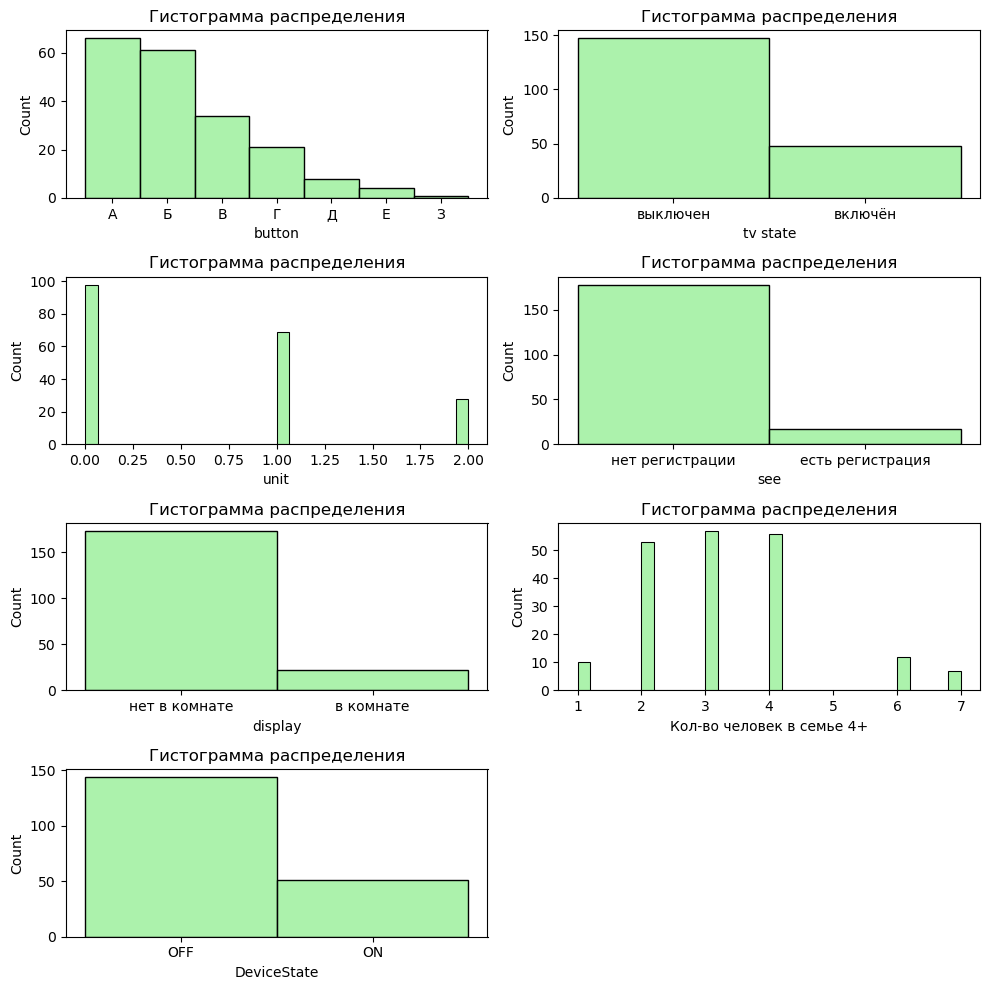

In [18]:
# Построение гистограмм распределения 
fig = plt.figure(figsize=(10, 10));
count = 1 
for column in df[['button', 'tv state', 'unit', 'see', 'display', 'Кол-во человек в семье 4+', 'DeviceState']]:
    plt.subplot(4, 2, count)
    sns.histplot(df[column], color='lightgreen', label='df', bins=30)
    count += 1
    plt.title('Гистограмма распределения')
plt.tight_layout()
plt.show()

**Замечание:** На гистограммах мы видим как распределяются наши данные. Имеем в виду, что у нас всего 43 домохозяйств. Всего у нас 195 строк (в домохозяйстве может быть несколько ТВ и жителей).

#### Рассмотрим результаты опроса и информацию с пиплметра для всех ТВ домохозяйств.

выключен    54
включён     19
Name: tv state, dtype: int64

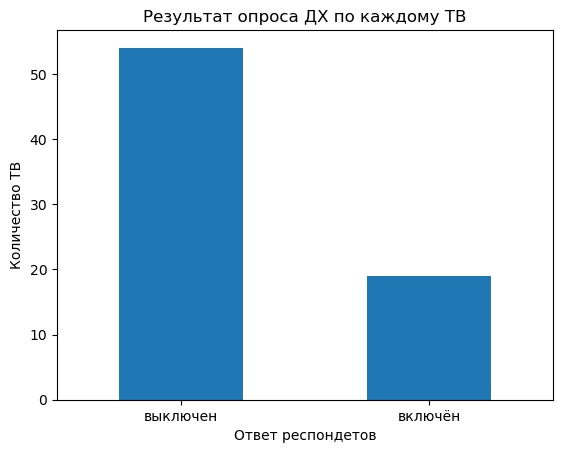

In [19]:
# Группировка данных и вывод графика
df.groupby(['passport','unit'])['tv state'].first().value_counts().plot(kind='bar', rot=0);
plt.title('Результат опроса ДХ по каждому ТВ');
plt.xlabel('Ответ респондетов');
plt.ylabel('Количество ТВ');
df.groupby(['passport','unit'])['tv state'].first().value_counts()

OFF    52
ON     21
Name: DeviceState, dtype: int64

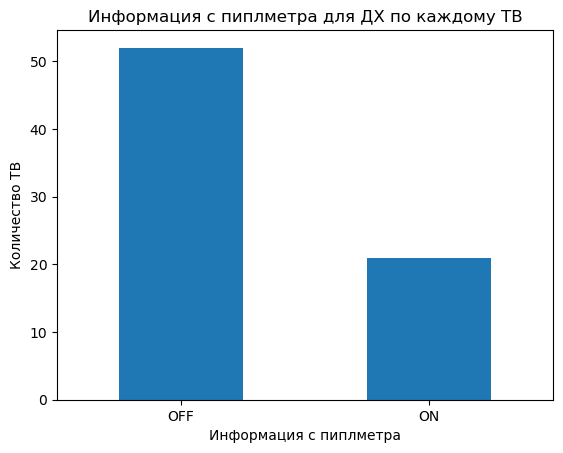

In [20]:
# Группировка данных и вывод графика
df.groupby(['passport','unit'])['DeviceState'].first().value_counts().plot(kind='bar', rot=0);
plt.title('Информация с пиплметра для ДХ по каждому ТВ');
plt.xlabel('Информация с пиплметра');
plt.ylabel('Количество ТВ');
df.groupby(['passport','unit'])['DeviceState'].first().value_counts()

**Замечание:** В обоих случаях ТВ чаще выключен, чем включён. Информация из опроса и пиплметра немного отличается.

#### Выясним сколько ТВ имеется в домохозяйствах.

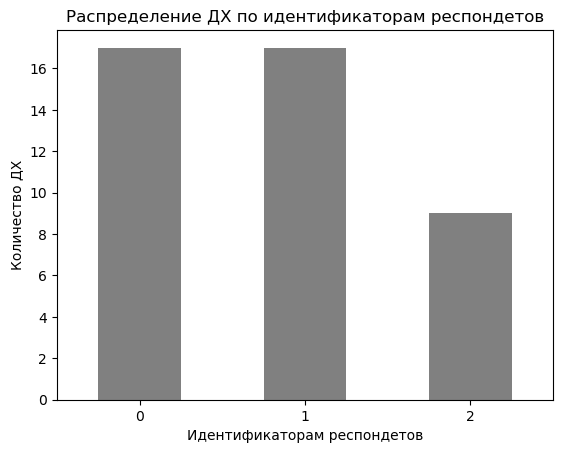

In [21]:
# Группировка данных и вывод графика
df.groupby('passport')['unit'].max().value_counts().plot(kind='bar', rot=0, color='grey');
plt.title('Распределение ДХ по идентификаторам респондетов');
plt.xlabel('Идентификаторам респондетов');
plt.ylabel('Количество ДХ');

**Замечание:** В основном в ДХ имеется либо 1 либо 2 ТВ. И в 2 раза реже 3 телевизора.

#### Выясним сколько человек проживает в домохозяйстве.

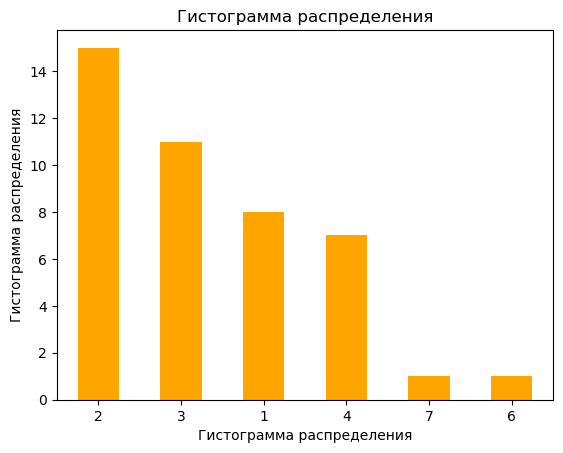

In [22]:
# Группировка данных и вывод графика
df.groupby('passport')['Кол-во человек в семье 4+'].max().value_counts().plot(kind='bar', rot=0, color='orange');
plt.title('Гистограмма распределения');
plt.xlabel('Гистограмма распределения');
plt.ylabel('Гистограмма распределения');

**Замечание:** На графике мы видим, что щаще всего в ДХ проживает 2 человека и очень редко 6 или 7 респондентов.